In [18]:
import requests
from bs4 import BeautifulSoup
from pandas_datareader import data
import datetime as dt
from datetime import datetime
import urllib
import time
from matplotlib import style
import pandas as pd


In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~')
plt.rcParams["axes.unicode_minus"]=False

In [369]:
import pandas as pd 
url = "http://finance.naver.com/item/sise_day.nhn?code=040300"
 # 일자 데이터를 담을 df라는 DataFrame 정의
df = pd.DataFrame()
 # 1페이지에서 20페이지의 데이터만 가져오기
for page in range(1, 464):
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    df = df.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
 # df.dropna()를 이용해 결측값 있는 행 제거
df = df.dropna() # 상위 5개 데이터 확인하기 
    
df.head()

,날짜,종가,전일비,시가,고가,저가,거래량
1,2020.06.04,1905.0,5.0,1915.0,1925.0,1875.0,129623.0
2,2020.06.03,1910.0,10.0,1920.0,1950.0,1890.0,85827.0
3,2020.06.02,1920.0,5.0,1915.0,1950.0,1910.0,15584.0
4,2020.06.01,1915.0,0.0,1900.0,1965.0,1880.0,90005.0
5,2020.05.29,1915.0,25.0,1960.0,1960.0,1815.0,93141.0


In [370]:
df["날짜"]=pd.to_datetime(df["날짜"],format="%Y/%m/%d")

In [371]:
df=df.set_index("날짜")

In [372]:
df.sort_index(ascending=True,inplace=True)

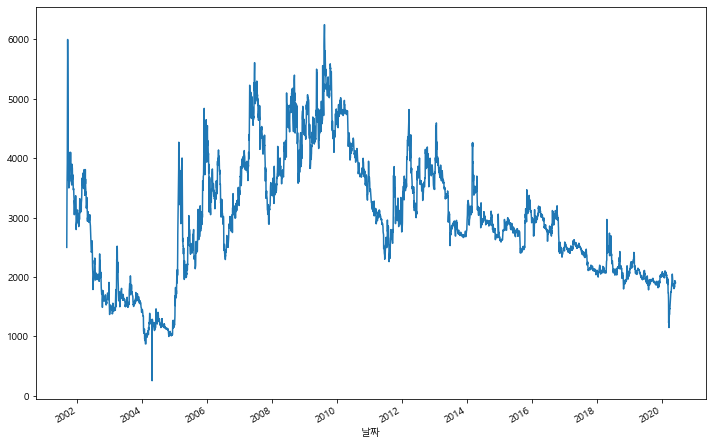

In [373]:
df["종가"].plot(figsize=(12,8))

In [389]:
df_trunc=df["2019.01.01":"2020.06.03"]#위그래프보고 날짜 수정

In [390]:
df2=pd.DataFrame({"ds":df_trunc.index,"y":df_trunc["종가"]})
df2.reset_index(inplace=True)
del df2["날짜"]

In [391]:
df2.head()

,ds,y
0,2019-01-02,2050.0
1,2019-01-03,2085.0
2,2019-01-04,2060.0
3,2019-01-07,2105.0
4,2019-01-08,2140.0


In [392]:
from fbprophet import Prophet
m=Prophet(daily_seasonality=True,yearly_seasonality=True)
m.fit(df2)

In [396]:
future=m.make_future_dataframe(periods=7*20)
future.tail()

,ds
485,2020-10-17
486,2020-10-18
487,2020-10-19
488,2020-10-20
489,2020-10-21


In [397]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
485,2020-10-17,2263.324114,2059.641868,2465.103850
486,2020-10-18,2263.933065,2073.504243,2456.603416
487,2020-10-19,2239.148233,2040.692622,2429.302308
488,2020-10-20,2246.216212,2032.940748,2458.230644
489,2020-10-21,2253.924984,2058.053291,2453.648377


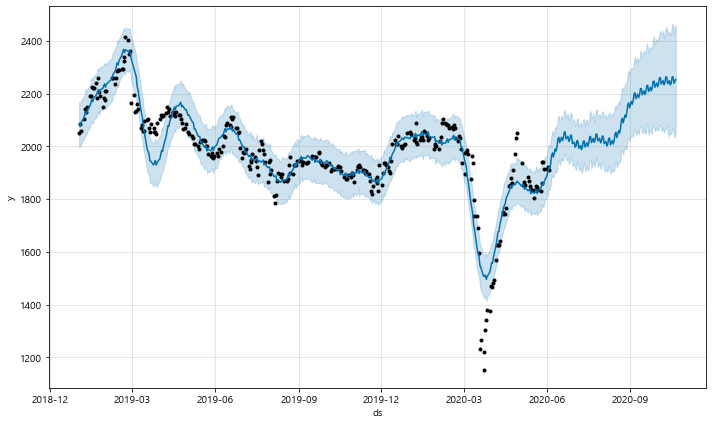

In [398]:
m.plot(forecast);

In [146]:
df_trunc=df["2018.01.01":"2020.6.3"]

In [147]:
df2=pd.DataFrame({"ds":df_trunc.index,"y":df_trunc["종가"]})
df2.reset_index(inplace=True)
del df2["날짜"]

In [148]:
m=Prophet(daily_seasonality=True)
m.fit(df2)

In [152]:
future=m.make_future_dataframe(periods=60)
future.tail()

,ds
649,2020-07-29
650,2020-07-30
651,2020-07-31
652,2020-08-01
653,2020-08-02


In [153]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
649,2020-07-29,1410.484950,1295.529977,1532.448087
650,2020-07-30,1400.731168,1271.724856,1521.353655
651,2020-07-31,1397.622245,1282.918642,1520.015460
652,2020-08-01,1416.304305,1289.124053,1536.693512
653,2020-08-02,1412.231090,1300.288663,1538.205607


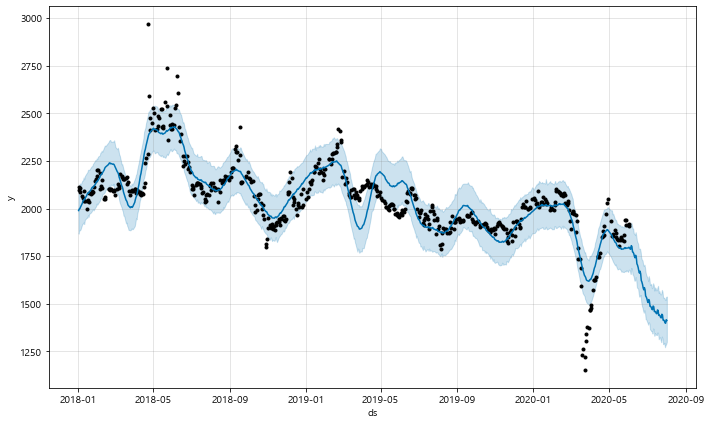

In [154]:
m.plot(forecast);

In [414]:
from selenium import webdriver
import time

In [415]:
driver = webdriver.Chrome('../driver/chromedriver')
driver.get('https://finance.naver.com/item/board.nhn?code=040300')

In [416]:
html = driver.page_source

In [417]:
soup = BeautifulSoup(html, 'html.parser')

In [418]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

url = 'https://finance.naver.com/item/board.nhn?code=040300&page={}'
text = []
#for n in range(1,2):
for n in range(1,96):
    driver.get(url.format(n))
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    titlelist = soup.find_all('td',class_='title')
    #print(titlelist)
    for title in titlelist:
        text.append(title.get_text().strip())

In [419]:
import nltk
from konlpy.tag import Okt
t = Okt()

In [420]:
dis_text = ''
for each_line in text:
    dis_text += (each_line+'\n') 

In [ ]:
dis_text

In [421]:
tokens_ko = t.morphs(dis_text)

In [422]:
tokens_ko

['지수',
 '를',
 '봐라',
 '\n\t\t\t\t',
 '[',
 '1',
 ']',
 '\n',
 'YTN',
 '자산',
 '가치',
 '\n\t\t\t\t',
 '[',
 '1',
 ']',
 '\n',
 '부동산',
 '가치',
 '만해',
 '도',
 '얼마',
 '냐',
 '\n',
 '[',
 '역사',
 '에',
 '"',
 '독립운동',
 '"',
 '은',
 '꼭',
 '총',
 '칼',
 '들',
 '지',
 '않아도',
 '...',
 '\n',
 '2000원',
 '만유지해줘',
 'ㅡㅡ',
 '\n',
 '너',
 '는',
 '왜',
 '안',
 '가',
 '?',
 '\n\t\t\t\t',
 '[',
 '1',
 ']',
 '\n',
 '기레기',
 '꺼져',
 '\n',
 '[',
 '인문학',
 '은',
 '인류',
 '의',
 '선생',
 '이',
 '아니다',
 '하인',
 '이다',
 '...',
 '\n\t\t\t\t',
 '[',
 '1',
 ']',
 '\n',
 '답신',
 '\n',
 '아',
 'ㅡ',
 '쫌',
 '2000원',
 '만',
 '가줘라',
 'ㅡ',
 '\n',
 '오늘',
 '왜',
 '오르지',
 '?',
 '\n',
 '조건식',
 '\n\t\t\t\t',
 '[',
 '1',
 ']',
 '\n',
 '좃선',
 '동',
 'A',
 'MBN',
 '연합',
 '친일',
 '매국',
 '도',
 '...',
 '\n\t\t\t\t',
 '[',
 '3',
 ']',
 '\n',
 '[',
 '과학기술',
 '이',
 '인류',
 '사회',
 '대표',
 '했다면',
 '지금',
 '과',
 '같지',
 '않',
 '...',
 '\n',
 '[',
 '이',
 '지경',
 '까지',
 '오게',
 '만든',
 '자의',
 '이름',
 '은',
 '"',
 '국민',
 '"',
 '이',
 '...',
 '\n',
 '연합',
 '의',
 '어떤',
 '섹',
 '이',
 '박',
 

In [423]:
ko = nltk.Text(tokens_ko, name='YTN토론실')

In [424]:
ko
len(ko.tokens)
len(set(ko.tokens))

4233

In [425]:
ko.vocab().most_common(100)

[('\n', 1895),
 ('[', 990),
 (']', 690),
 ('\n\t\t\t\t', 599),
 ('...', 437),
 ('1', 402),
 ('이', 222),
 ('2', 151),
 ('가', 145),
 ('에', 137),
 ('는', 119),
 ('들', 117),
 ('은', 106),
 ('.', 89),
 ('?', 87),
 ('의', 86),
 ('다', 76),
 ('오늘', 68),
 ('YTN', 63),
 ('■■', 61),
 ('코스닥', 60),
 ('한', 58),
 ('을', 56),
 ('공매도', 56),
 ('~', 54),
 ('도', 50),
 ('3', 49),
 ('하', 48),
 ('■■■', 46),
 ('..', 44),
 ('를', 42),
 ('아', 41),
 ('ytn', 39),
 ('주', 38),
 ('김정은', 37),
 ('나', 36),
 ('이다', 35),
 ('왜', 34),
 ('안', 34),
 ('뉴스', 34),
 ('으로', 34),
 ('매', 33),
 ('!!]', 32),
 ('과', 30),
 ('ㅋㅋ', 30),
 ('상한', 30),
 ('언론', 30),
 ('"', 28),
 ('라', 28),
 ('말', 27),
 (',', 27),
 ('만', 26),
 ('인', 26),
 ('지', 25),
 ('....', 25),
 ('잘', 25),
 ('매수', 25),
 ('네', 25),
 ('개', 25),
 ('적', 25),
 ('/', 25),
 ('로', 25),
 ('거', 24),
 ('내', 24),
 ('대', 24),
 ('해', 24),
 ('주식', 24),
 ('공', 23),
 ('에서', 23),
 ('좀', 22),
 ('상', 22),
 ('거래', 22),
 ('고', 21),
 ('수', 21),
 ('매도', 21),
 ('??]', 21),
 ('인문학', 20),
 ('재앙', 20),
 (

In [426]:
stop_words = ['제','돈','와','명','너','때','!','냐','까지','야','면','자','\n','[',']','\n\t\t\t\t','...','1','2','이','가','에',
             '는','들','은','.','?','의','다','■■','~','도','3','하','..','■■■','\n','를','아','주','나','이다','왜','안','으로',
             '매','!!]','과','ㅋㅋ','"','라','말',',','만','인','지','....','잘','내','개','적','/','네','로','거','대','대',
             '공','에서','좀','상','고','수','??]','장','=','기이네','-','??','못','ㅋ','그','괴','된','기','게','하는','요','것',
             ']..','왓다','ㅡ','호','또','원','낼','뭐','정','조','저','!!','위','더','4','ㅜ','잡','.....','니','5','너무','하고',
              '부터','~~','간다','모든','한다','방','서','이냐','Mr','~~~','..]','[...',']...','씨','타','하면','이런','날','외','이야',
             "'",'할','두','량','봐라','아니다','?...','!...','몇','같다','하지','뭉','난','합니다','에게','입니다','없다','얘',
             '하세요','순','하자','엔','성','이건','보고','해','을','양','쇼']

In [427]:
tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]


In [428]:
ko = nltk.Text(tokens_ko, name='YTN토론실')
ko.vocab().most_common(100)

[('오늘', 68),
 ('YTN', 63),
 ('코스닥', 60),
 ('한', 58),
 ('공매도', 56),
 ('ytn', 39),
 ('김정은', 37),
 ('뉴스', 34),
 ('상한', 30),
 ('언론', 30),
 ('매수', 25),
 ('주식', 24),
 ('거래', 22),
 ('매도', 21),
 ('인문학', 20),
 ('재앙', 20),
 ('폐지', 20),
 ('금융', 20),
 ('회담', 19),
 ('내일', 18),
 ('중', 18),
 ('트럼프', 18),
 ('시간', 18),
 ('하락', 17),
 ('폭락', 17),
 ('발표', 17),
 ('인가', 16),
 ('쓰레기', 16),
 ('한국', 16),
 ('이네', 16),
 ('문상', 16),
 ('우리', 15),
 ('주가', 15),
 ('이란', 15),
 ('명함', 15),
 ('시장', 14),
 ('정은', 14),
 ('일', 14),
 ('방송', 14),
 ('북미', 14),
 ('종가', 14),
 ('지금', 13),
 ('사람', 13),
 ('속보', 13),
 ('능멸', 13),
 ('Ytn', 13),
 ('인류', 12),
 ('과학기술', 12),
 ('관련', 12),
 ('남북', 12),
 ('문죄인', 12),
 ('도학', 12),
 ('증권', 12),
 ('서울', 12),
 ('답방', 12),
 ('시작', 11),
 ('식민지', 10),
 ('진짜', 10),
 ('대통령', 10),
 ('당', 10),
 ('주주', 10),
 ('President', 10),
 ('미국', 10),
 ('종목', 10),
 ('정상회담', 10),
 ('특검', 10),
 ('월요일', 9),
 ('개미', 9),
 ('프로', 9),
 ('바이오', 9),
 ('단어', 9),
 ('마귀', 9),
 ('상승', 9),
 ('회사', 9),
 ('인들', 9),
 ('라도', 9),
 

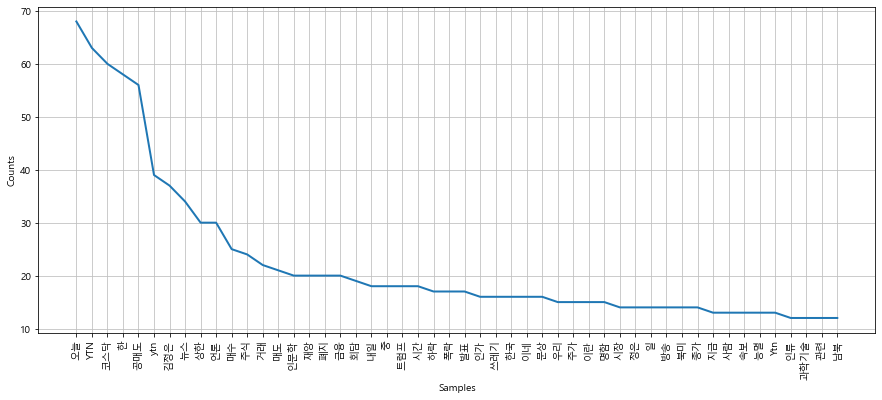

In [429]:
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

In [430]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [431]:
mask = np.array(Image.open('../data/ytn.jpg'))
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [434]:
data = ko.vocab()
#c:/Windows/Fonts/malgun.ttf
wc = WordCloud(font_path = 'c:/Windows/Fonts/malgun.ttf',mask=mask,
              relative_scaling = 0.1,
              background_color='white',
              min_font_size=1,
              max_font_size=100).generate_from_frequencies(dict(data))
default_colors = wc.to_array()

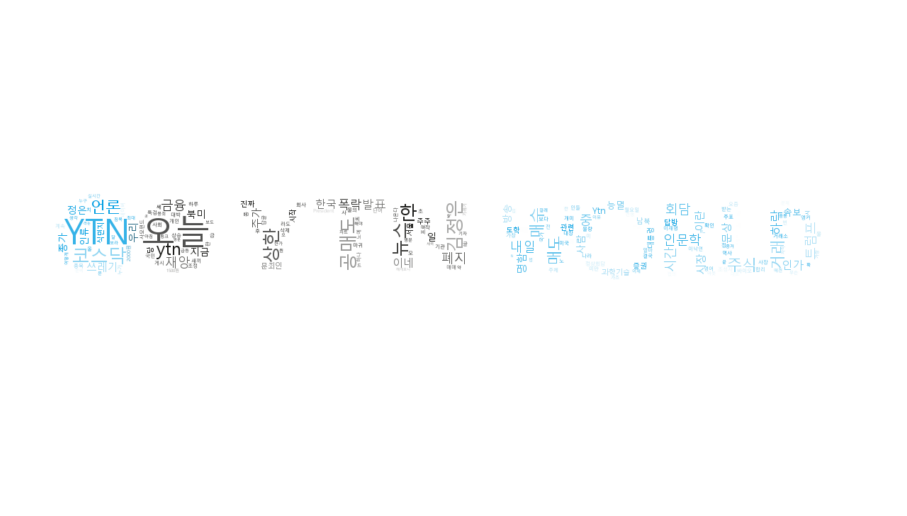

In [435]:
plt.figure(figsize=(16,16))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()